In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

import seaborn as sns
sns.set_palette(palette='muted')

from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, linregress
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('./data/qwantify.csv')

In [3]:
df.head()

,startTime_ISO8601,startTime_secondsSinceMidnight1Jan1970UTC,estimatedSecondsSinceAlert,wantingAnything,whatWanting,wantingIntensity,wantedToFeel_control,wantedToFeel_lessStress,wantedToFeel_goodAboutMe,wantedToFeel_connected,wantedToFeel_comfort,wantedToFeel_novelty,wantedToFeel_calm,wantedToFeel_health,wantedToFeel_energy,wantedToFeel_goodPerson,wantedToFeel_competent,wantedToFeel_acknowledged,wantedToFeel_helpful,wantedToFeel_other,wantedToFeel_specifiedOther,wantedToFeel_nothingInParticular,doing,doing_specifiedOther,withOthers,feelingBadToGood,energy,physically_good,physically_energized,physically_hungry,physically_tired,physically_uncomfortable,physically_other,physically_specifiedOther,physically_noFeeling,feeling_angry,feelingIntensity_angry,feeling_anxious,feelingIntensity_anxious,feeling_awe,feelingIntensity_awe,feeling_content,feelingIntensity_content,feeling_frustrated,feelingIntensity_frustrated,feeling_grateful,feelingIntensity_grateful,feeling_happy,feelingIntensity_happy,feeling_jealous,feelingIntensity_jealous,feeling_loving,feelingIntensity_loving,feeling_proud,feelingIntensity_proud,feeling_restless,feelingIntensity_restless,feeling_sad,feelingIntensity_sad,feeling_other,feeling_specifiedOther,feeling_noEmotion,thinkingOverAndOver,comparingToOthers,lonely,selfWorth,appreciating,stressed
0,2017-05-02T20:11:01-07:00,1493781061,2351.0,2,Work on data project,0.494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,talk,NaN,2,0.633,0.771,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.629,0.000,0.000
1,2017-05-02T12:41:30-07:00,1493754090,2354.0,2,Apply to jobs,0.281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,chores,NaN,0,0.506,0.629,0,0,0,0,0,0,NaN,1,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,0.426,NaN,0.0,0.500,0.000,0.104
2,2017-05-02T08:34:34-07:00,1493739274,7.0,2,Paint the stairs,0.283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Meditating,0,0.500,0.502,0,0,0,0,1,0,NaN,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.175,NaN,0.0,0.363,0.000,0.289
3,2017-05-01T21:34:24-07:00,1493699664,4591.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Dancing,2,0.633,0.500,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.514,0.791,0.000
4,2017-05-01T15:49:41-07:00,1493678981,8616.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Looking for a job,0,0.500,0.500,0,0,0,0,0,0,NaN,1,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.000,NaN,0.0,0.502,0.000,0.143


In [4]:
continuous_cols = ['wantingIntensity','feelingBadToGood','energy', 'thinkingOverAndOver','lonely','selfWorth','appreciating','stressed']


** Split DataFrames up**

In [5]:
dfc = df[['wantingAnything'] + continuous_cols]
dfw = df[df['wantingAnything']==2]
dfw_activity = dfw[['wantingIntensity','energy','doing']]
dfw_activity = pd.concat(objs=[dfw_activity, pd.get_dummies(data=dfw_activity['doing'])], axis=1)#.drop(labels='doing', axis=1)

### Explore the conditions that correspond with high levels of intensity of want and stress?

In [24]:
want_vals = dfc[dfc['wantingAnything']==2].ix[:, 'wantingIntensity'].values
stress_vals = dfc[dfc['wantingAnything']==2].ix[:, 'stressed'].values

# plt.hist(want_vals, bins=10);
# plt.hist(stress_vals, bins=20);

In [26]:
# print np.mean(want_vals)
# print np.std(want_vals)
want_vals[np.where(want_vals > (np.mean(want_vals) + np.std(want_vals)))];

In [8]:
df_high_stress = df[(df['wantingAnything']==2) & \
    (df['wantingIntensity'] > (np.mean(want_vals))) & \
    (df['stressed'] > (np.median(stress_vals)))]

df_low_stress = df[(df['wantingAnything']==2) & \
    (df['wantingIntensity'] > (np.mean(want_vals))) & \
    (df['stressed'] < (np.median(stress_vals)))]

**How does energy level vary with stress when want intensity is high?**

In [9]:
# print 'Using Mean Stressed Values'
# print 'High Want Intensity, Low Stress, mean energy level:',np.mean(df_low_stress.energy.values)
# print 'High Want Intensity, High Stress, mean energy level:',np.mean(df_high_stress.energy.values)

# print '\n',ttest_ind(a=df_low_stress.energy.values, b=df_high_stress.energy.values)

In [12]:
print 'Using Median Stressed Values'
print 'High Want Intensity, Low Stress, mean energy level:',np.mean(df_low_stress.energy.values)
print 'High Want Intensity, High Stress, mean energy level:',np.mean(df_high_stress.energy.values)

print '\n',ttest_ind(a=df_low_stress.energy.values, b=df_high_stress.energy.values)

Using Median Stressed Values
High Want Intensity, Low Stress, mean energy level: 0.664666666667
High Want Intensity, High Stress, mean energy level: 0.512111111111

Ttest_indResult(statistic=3.0522573892036644, pvalue=0.0037660749715205328)


**plot Stress vs. Energy (for high want intensity)**

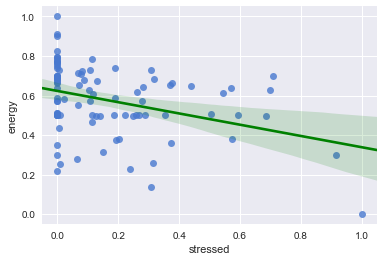

In [23]:
sns.regplot(x=dfw.stressed, y=dfw.energy, line_kws={'color':'green'})

In [ ]:
sns.regplot(x=dfw.stressed, y=dfw.energy, line_kws={'color':'green'})

**Conclusion**
<br> 
Stress decreases energy level, even when wanting intensity is high. 
<br><br>

**How does w/ people condition relate to high wanting and high stress? low stress?**

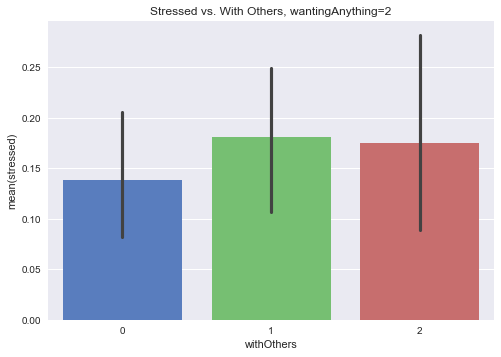

In [14]:
b = sns.barplot(x='withOthers', y='stressed', data=dfw, estimator=np.mean)

b.set_title('Stressed vs. With Others, wantingAnything=2')

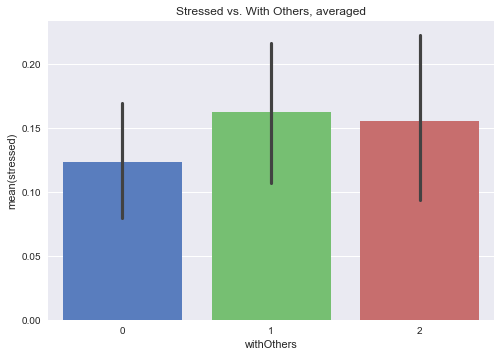

In [15]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# b = sns.barplot(x='withOthers', y='stressed', hue='wantingAnything', data=df, estimator=np.mean, ax=ax1, )
# ax1.set_title('Stressed vs. With Others, by wantingAnything')


b = sns.barplot(x='withOthers', y='stressed', data=df, estimator=np.mean)
b.set_title('Stressed vs. With Others, averaged')


**Create bar graphs for each activity from data with high levels of Want Intensity**
Height of the bar corresponds with frequency of that activity. 
Hue would be the high energy and low energy state.

Create columns for want_state, energy_state

In [16]:
median_want = np.median(dfw_activity['wantingIntensity'].values)
median_energy = np.median(dfw_activity['energy'].values)

dfw_activity['want_state'] = dfw_activity['wantingIntensity'].apply(lambda x: 1 if x > median_want else 0)
dfw_activity['energy_state'] = dfw_activity['energy'].apply(lambda x: 1 if x > median_energy else 0)

dff = dfw_activity[dfw_activity['want_state'] == 1]

In [17]:
dff.head(2)

,wantingIntensity,energy,doing,chores,eat,exercise,leisure,other,talk,travel,work,want_state,energy_state
0,0.494,0.771,talk,0,0,0,0,0,1,0,0,1,1
9,0.538,0.715,chores,1,0,0,0,0,0,0,0,1,1


In [18]:
dff['chores'].values_counts

bar_heights = (men, women)
x = (1, 2)

fig, ax = plt.subplots()
width = 0.4

ax.bar(x, bar_heights, width)

AttributeError: 'Series' object has no attribute 'values_counts'

## Use plotly to plot Intensity of Want, Stress, and Appreciating the Moment

In [22]:
# py.offline.init_notebook_mode()

colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

color = colors[0]

data = []

trace = dict(
        name = 'Want Intensity, Stress, APpreciating',
        x=dfw['wantingIntensity'], 
        y=dfw['stressed'], 
        z=dfw['appreciating'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) 
)

data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Want Intensity, Stress, Appreciating',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Wanting Intensity'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Stressed'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Appreciating Moment'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)


fig = dict(data=data, layout=layout)

figure=go.Figure(data=data,layout=layout)

figure.update(dict(layout=dict(scene=dict(xaxis=dict(title='Wanting Intensity'), \
                                          yaxis=dict(title='Stressed'), \
                                          zaxis=dict(title='Appreciating')))
                  )
             )
                
py.iplot(figure, filename='want-stress-appreciating')

url = py.plot(fig, filename='pandas-3d-iris', validate=False)

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~codedorf/0 or inside your plot.ly account where it is named 'want-stress-appreciating'


## Non-Negative Matrix Factorization to reduce dimensions to 2

In [27]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

n_components = 2

**Fit NMF**

In [28]:
nmf = NMF(n_components=n_components, init='random', random_state=0)
nmf.fit(dfw[continuous_cols])

NMF(alpha=0.0, beta=1, eta=0.1, init='random', l1_ratio=0.0, max_iter=200,
  n_components=2, nls_max_iter=2000, random_state=0, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [29]:
nmf.components_

array([[ 1.25743575,  1.63961353,  1.60207417,  0.        ,  0.04023269,
         1.47850633,  0.31406392,  0.07867169],
       [ 0.48240781,  0.30641305,  0.38038288,  0.87053344,  0.04953943,
         0.43094422,  0.        ,  0.79942308]])

**Find columns that make up the two components**

In [30]:
def print_top_cols(model, col_names, n_top_cols):
    xaxis_titles = []
    yaxis_titles = []
    zaxis_titles = []
        
    for idx, weights in enumerate(model.components_):
        print("Latent Feature #%d:" % idx)
        print(" ".join([col_names[i] + ' ({weight})'.format(weight=round(weights[i],3))
                        for i in weights.argsort()[:-n_top_cols - 1:-1]]))
        
        
        if idx == 0:
            xaxis_titles = [col_names[i] for i in weights.argsort()[:-n_top_cols - 1:-1]]
        elif idx == 1:
            yaxis_titles = [col_names[i] for i in weights.argsort()[:-n_top_cols - 1:-1]]
        elif idx == 2:
            zaxis_titles = [col_names[i] for i in weights.argsort()[:-n_top_cols - 1:-1]]
    
    return xaxis_titles, yaxis_titles, zaxis_titles

In [31]:
xaxis_titles, yaxis_titles, zaxis_titles = print_top_cols(nmf, continuous_cols, 2)

Latent Feature #0:
feelingBadToGood (1.64) energy (1.602)
Latent Feature #1:
thinkingOverAndOver (0.871) stressed (0.799)


In [32]:
xaxis_titles

['feelingBadToGood', 'energy']

**Transform original dataset - reduce dimensions through NMF**

In [33]:
# NMF
result = nmf.transform(dfw[continuous_cols])

# PCA
pca = PCA(n_components=n_components)
result_pca = pca.fit_transform(dfw[continuous_cols])

In [34]:
print dfw[continuous_cols].shape
print result_pca.shape
print result.shape

(93, 8)
(93, 2)
(93, 2)


**PCA Scatter Plot**

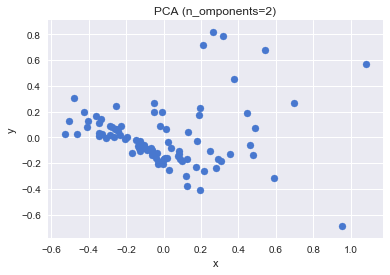

In [35]:

plt.scatter(x=result_pca[:, 0], y=result_pca[:, 1])
plt.title('PCA (n_omponents=2)')
plt.xlabel('x')
plt.ylabel('y')

**NMF Scatter Plot**

In [36]:
# # Split up data based on withOthers value
# result_2 = np.extract(dfw['withOthers'].values == 2, result)
# result_1 = np.extract(dfw['withOthers'].values == 1, result)
# result_0 = np.extract(dfw['withOthers'].values == 0, result)

In [37]:
# Split up data based on withOthers value
result_2 = result[dfw['withOthers'].values == 2]
result_1 = result[dfw['withOthers'].values == 1]
result_0 = result[dfw['withOthers'].values == 0]

In [38]:
trace_comp0 = go.Scatter(
    x=result_0[:,0],
    y=result_0[:,1],
    mode='markers',
    marker=dict(size=12,
                line=dict(width=1),
                color="navy"
               ),
    name='withOthers = 0', # series name
    text='withOthers = 0', # text for each point 
    )

trace_comp1 = go.Scatter(
    x=result_1[:,0],
    y=result_1[:,1],
    mode='markers',
    marker=dict(size=12,
                line=dict(width=1),
                color="red"
               ),
    name='withOthers = 1', # series name
    text='withOthers = 1', # text for each point 
    )

trace_comp2 = go.Scatter(
    x=result_2[:,0],
    y=result_2[:,1],
    mode='markers',
    marker=dict(size=12,
                line=dict(width=1),
                color="green"
               ),
    name='withOthers = 2', # series name
    text='withOthers = 2', # text for each point 
    )


data_comp = [trace_comp0,trace_comp1,trace_comp2]

layout_comp = go.Layout(
    title='Actively Wanting NMF (n_components=2)',
    hovermode='closest',
    xaxis=dict(
        title=", ".join(xaxis_titles),
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title=", ".join(yaxis_titles),
        ticklen=5,
        gridwidth=2,
    ),
)

fig_comp = go.Figure(data=data_comp, layout=layout_comp)

url = py.plot(fig_comp, filename='actively-wanting-with-others-nmf-2-components', validate=False)

# py.iplot(fig_comp, filename='actively-wanting-nmf-2-components')

# Preparation for Clustering
<br>
Reducing values to 1 point in n dimensions.

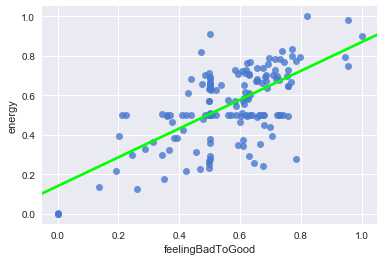

In [170]:
sns.regplot(x='feelingBadToGood', y='energy', data=df, line_kws={'color':'lime'}, robust=True, ci=None)

**Reducing n-dimensions to a single point.**
<br>
1. Take the average of each dimension, and these averages become the coordinates of your point. 
2. Find the slope of the linear regression line for each dimension, and then you have many slopes for each pair of predictors. 

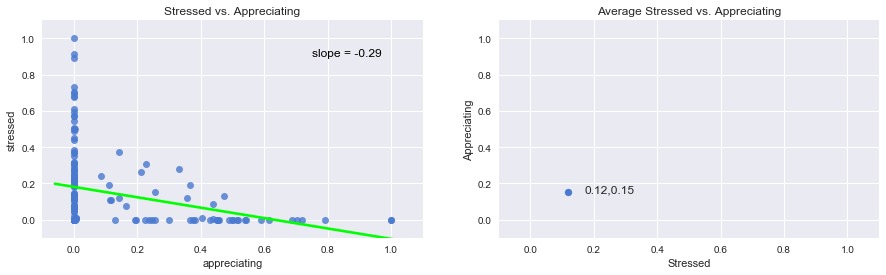

In [214]:
# Method 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Actual points 
sns.regplot(x='appreciating', y='stressed', data=df, line_kws={'color':'lime'}, robust=False, ci=None, ax=ax1)
linregressResult = linregress(x=df['appreciating'].values, y=df['stressed'].values)
slope = round(linregressResult.slope, 2)
ax1.text(0.75, 0.90,'slope = {}'.format(slope), fontsize=12, color='black') 
ax1.set_ylim((-0.1,1.1))
ax1.set_xlim((-0.1,1.1))
ax1.set_title('Stressed vs. Appreciating')

# Average
x_avg = round(np.mean(df['appreciating'].values) , 2)
y_avg = round(np.mean(df['stressed'].values), 2)
ax2.scatter(x=x_avg, y=y_avg)
ax2.set_ylim((-0.1,1.1))
ax2.set_xlim((-0.1,1.1))
ax2.set_title('Average Stressed vs. Appreciating')
ax2.set_xlabel('Stressed')
ax2.set_ylabel('Appreciating')

ax2.annotate('{},{}'.format(x_avg, y_avg), (x_avg+0.05, y_avg), fontsize=12)

**Plot 3D scatter plot for loneliness, stress, and want**

In [19]:
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

color = colors[0]

data = []

trace_1 = dict(
        name = 'Want Intensity vs Stress vs Loneliness',
        x=dfw['wantingIntensity'], 
        y=dfw['stressed'], 
        z=dfw['lonely'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) 
)

data.append( trace_1 )

trace_2 = dict(
        name = 'Single Point Reduction w/ Mean',
        x=np.mean(dfw['wantingIntensity'].values), 
        y=np.mean(dfw['stressed'].values), 
        z=np.mean(dfw['lonely'].values),
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=5, color=colors[1], line=dict(width=0) ) 
)

data.append( trace_2 )


trace_3 = dict(
        name = 'Single Point Reduction w/ Median',
        x=np.median(dfw['wantingIntensity'].values), 
        y=np.median(dfw['stressed'].values), 
        z=np.median(dfw['lonely'].values),
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=5, color=colors[2], line=dict(width=0) ) 
)

data.append( trace_3 )



layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Want Intensity vs Stress vs Appreciating',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title = 'Wanting Intensity'
            
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title = 'Stressed'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title = 'Loneliness'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

figure=go.Figure(data=data,layout=layout)
                
py.iplot(figure, filename='want-stress-lonely')

# url = py.plot(fig, filename='pandas-3d-iris', validate=False)